<a href="https://colab.research.google.com/github/SiMori92/MarketOpen30-DL/blob/main/v2_Step3_Market_Open_30mins_Algo_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Inspect Training Set

Summary Statistics for Newly Calculated Columns:
       T-1 Price change  T-1 high-low spread  T-1 volume change  \
count       1442.000000          1442.000000        1442.000000   
mean           0.281314             6.994620           9.288935   
std            6.286703             4.530965          62.390385   
min          -38.592980             1.349728         -74.964291   
25%           -2.965283             3.873936         -21.078300   
50%            0.617315             5.771587          -2.204242   
75%            3.695949             8.861087          25.987501   
max           34.218798            47.588785        1567.348952   

       T-1 volume compared to last 5 trading days average  \
count                                        1442.000000    
mean                                          101.237552    
std                                            29.606813    
min                                            37.418091    
25%                                       

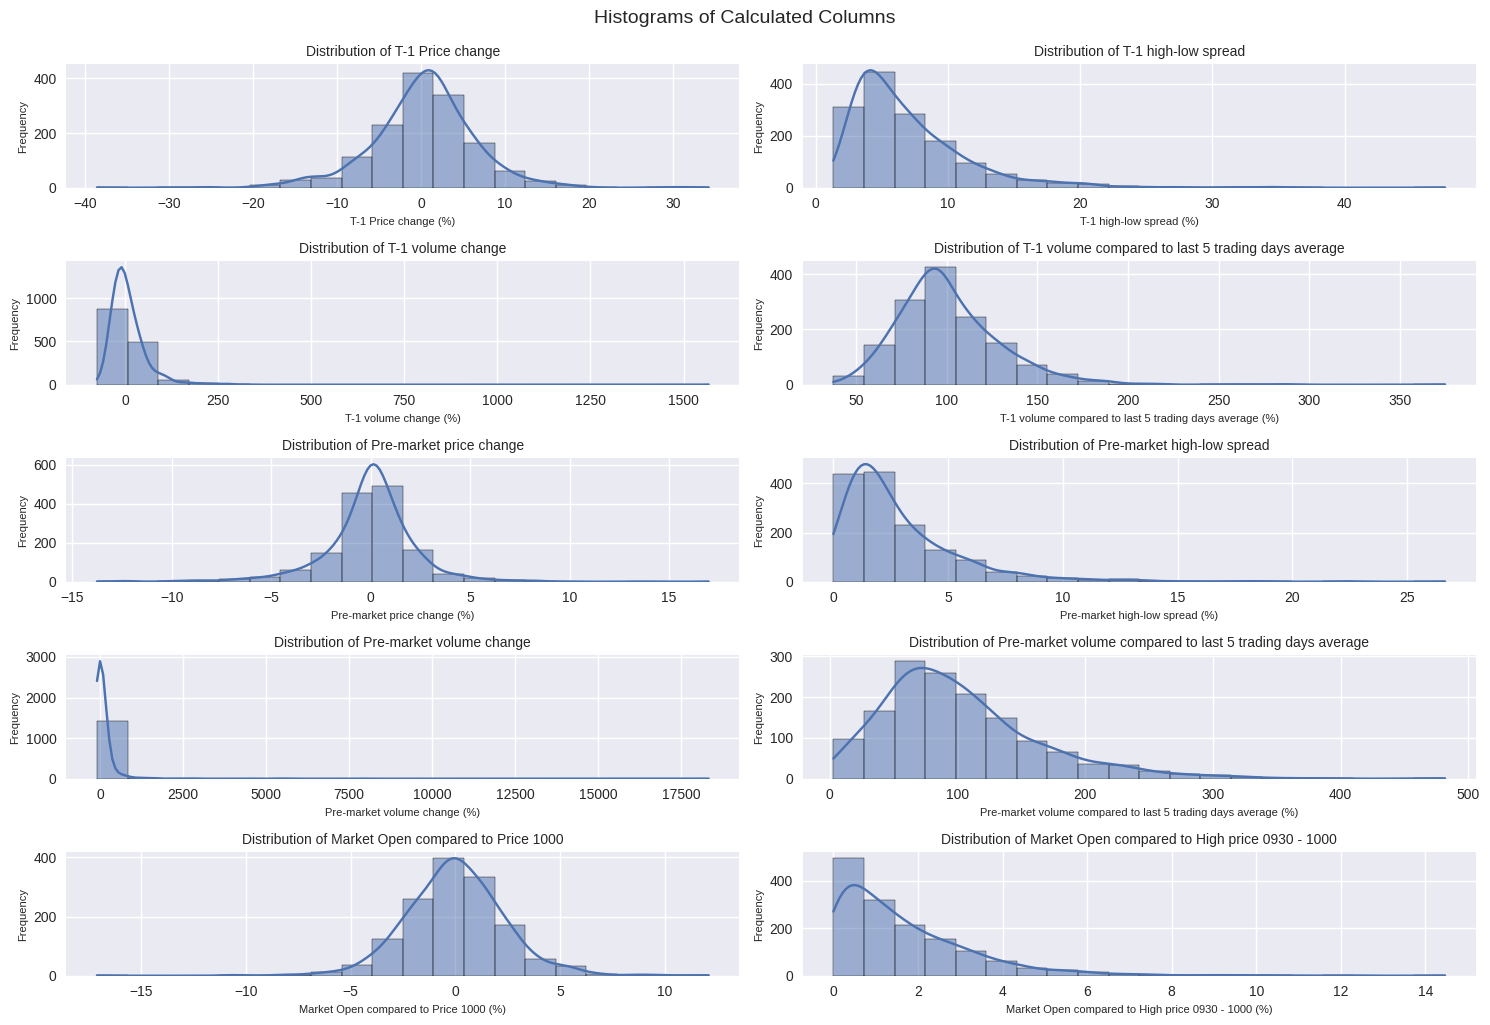

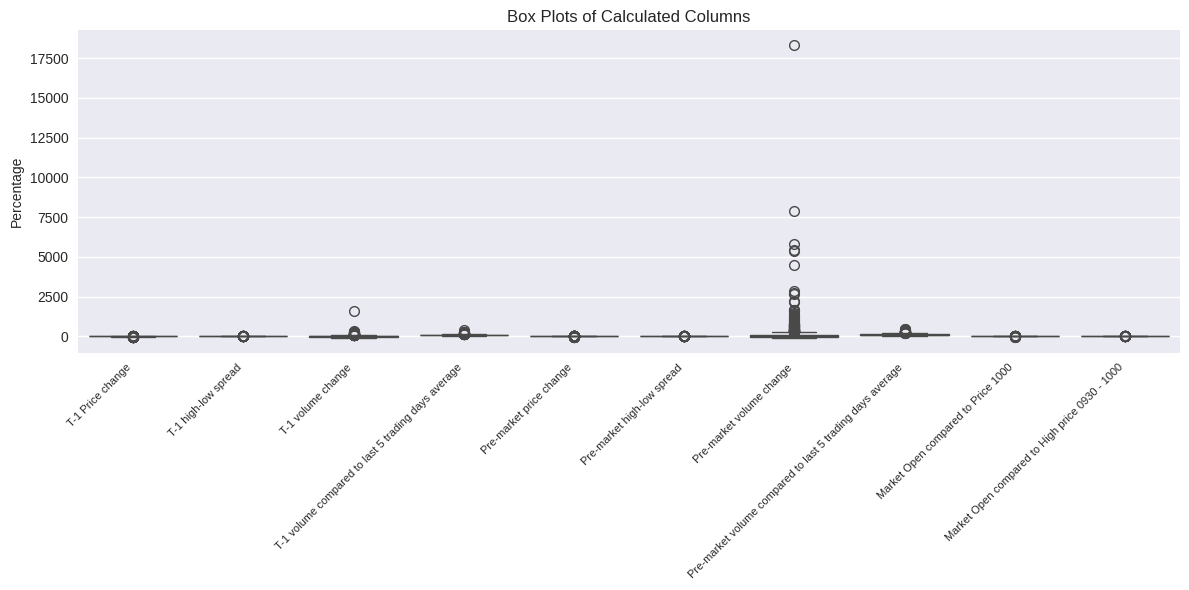

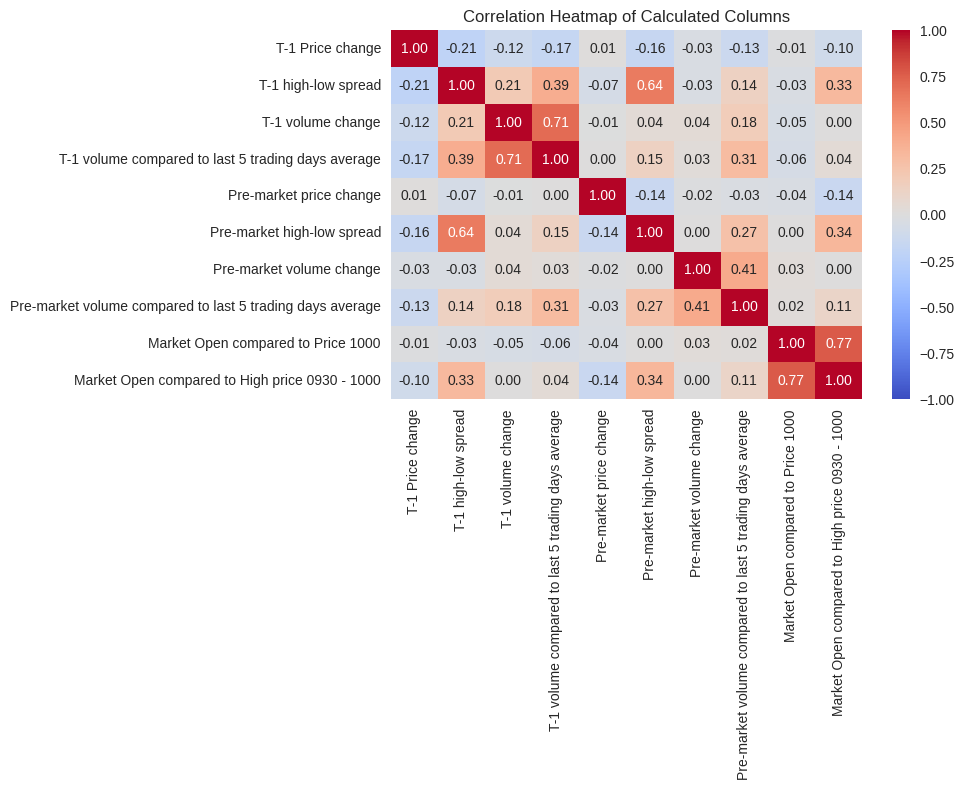

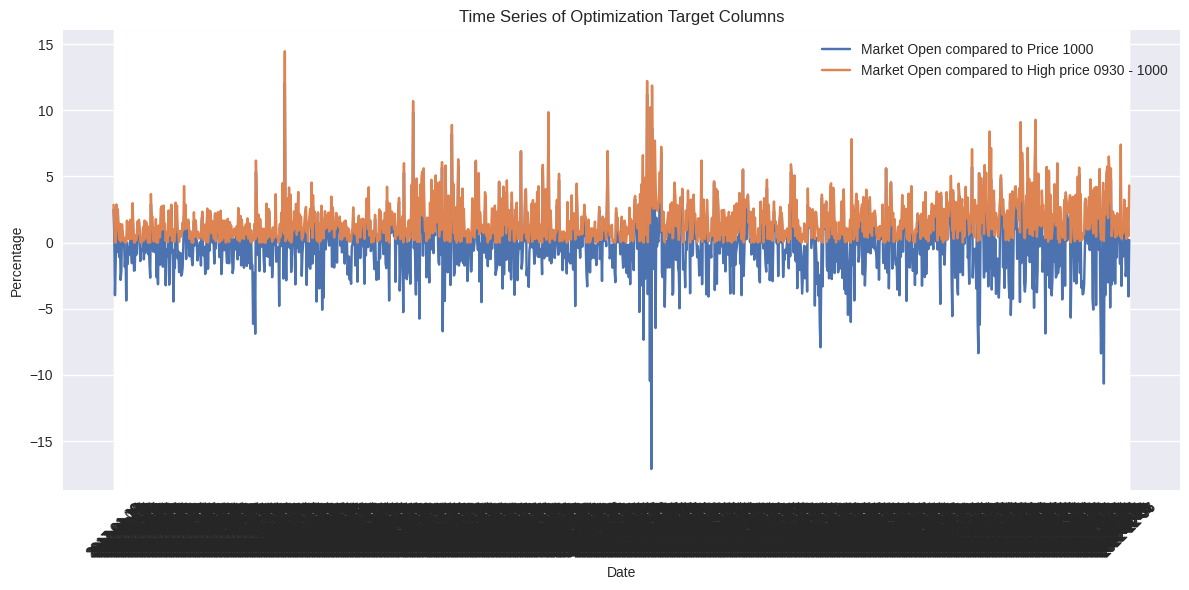

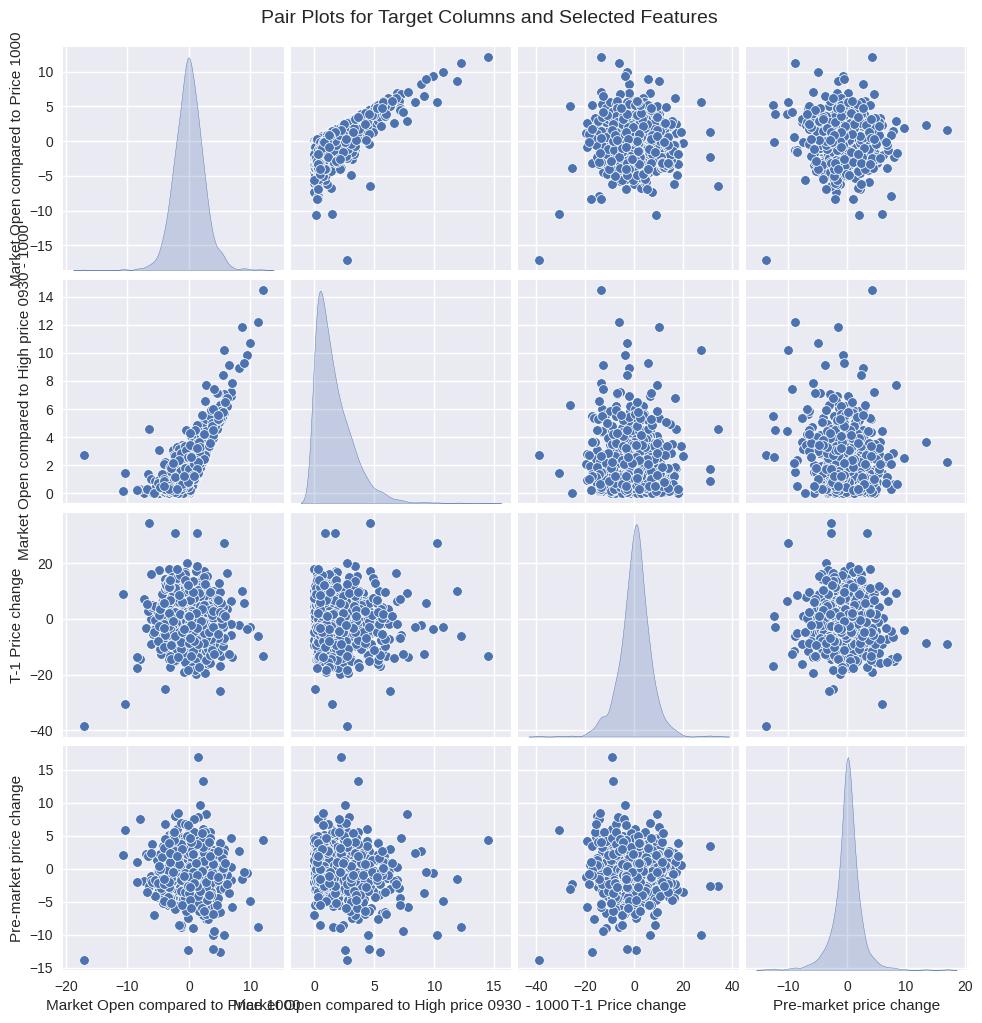

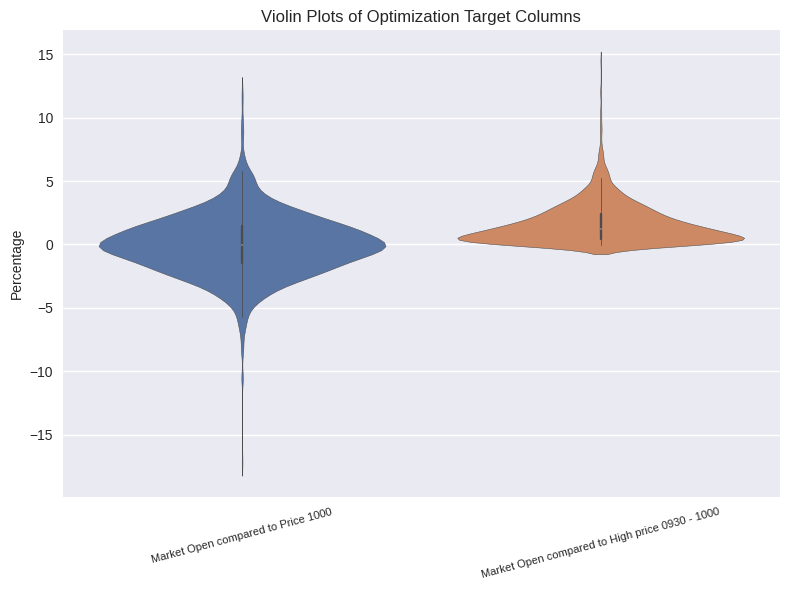


All plots displayed.


In [19]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plot style for better visualization
plt.style.use('seaborn-v0_8')  # Use a valid Matplotlib style
sns.set_palette("deep")

# Load the processed CSV data
def load_data(csv_file):
    df = pd.read_csv(csv_file)
    return df

# Inspect and visualize the newly calculated columns
def inspect_metrics(df):
    # Define the new columns to inspect
    new_columns = [
        'T-1 Price change',
        'T-1 high-low spread',
        'T-1 volume change',
        'T-1 volume compared to last 5 trading days average',
        'Pre-market price change',
        'Pre-market high-low spread',
        'Pre-market volume change',
        'Pre-market volume compared to last 5 trading days average',
        'Market Open compared to Price 1000',
        'Market Open compared to High price 0930 - 1000'
    ]

    # Summary statistics
    print("Summary Statistics for Newly Calculated Columns:")
    print(df[new_columns].describe())

    # Check for missing values
    print("\nMissing Values in Newly Calculated Columns:")
    print(df[new_columns].isna().sum())

    # Correlation matrix
    print("\nCorrelation Matrix for Newly Calculated Columns:")
    corr_matrix = df[new_columns].corr()
    print(corr_matrix)

    # Detailed analysis for optimization target columns
    target_columns = [
        'Market Open compared to Price 1000',
        'Market Open compared to High price 0930 - 1000'
    ]

    print("\nDetailed Distribution Analysis for Optimization Targets:")
    for col in target_columns:
        print(f"\n--- {col} ---")
        # Skewness and Kurtosis
        print(f"Skewness: {stats.skew(df[col].dropna()):.4f}")
        print(f"Kurtosis: {stats.kurtosis(df[col].dropna()):.4f}")
        # Normality test (Shapiro-Wilk)
        stat, p_value = stats.shapiro(df[col].dropna())
        print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p_value:.4f}")
        # Outlier detection using IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col]
        print(f"Number of Outliers (IQR method): {len(outliers)}")

    # Visualizations for all calculated columns
    # 1. Histograms for all new columns
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(new_columns, 1):
        plt.subplot(5, 2, i)
        sns.histplot(df[col].dropna(), kde=True, bins=20)
        plt.title(f'Distribution of {col}', fontsize=10)
        plt.xlabel(f'{col} (%)', fontsize=8)
        plt.ylabel('Frequency', fontsize=8)
        plt.tight_layout()
    plt.suptitle('Histograms of Calculated Columns', fontsize=14, y=1.02)
    plt.show()

    # 2. Box plots for all new columns
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[new_columns])
    plt.title('Box Plots of Calculated Columns', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.ylabel('Percentage', fontsize=10)
    plt.tight_layout()
    plt.show()

    # 3. Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
    plt.title('Correlation Heatmap of Calculated Columns', fontsize=12)
    plt.tight_layout()
    plt.show()

    # 4. Time series plots for target columns
    plt.figure(figsize=(12, 6))
    for col in target_columns:
        plt.plot(df['Date'], df[col], label=col)
    plt.title('Time Series of Optimization Target Columns', fontsize=12)
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Percentage', fontsize=10)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 5. Pair plots for target columns vs. others (limited to avoid clutter)
    pair_columns = target_columns + ['T-1 Price change', 'Pre-market price change']
    sns.pairplot(df[pair_columns].dropna(), diag_kind='kde')
    plt.suptitle('Pair Plots for Target Columns and Selected Features', fontsize=14, y=1.02)
    plt.show()

    # 6. Violin plots for target columns
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df[target_columns])
    plt.title('Violin Plots of Optimization Target Columns', fontsize=12)
    plt.xticks(rotation=15, fontsize=8)
    plt.ylabel('Percentage', fontsize=10)
    plt.tight_layout()
    plt.show()

    print("\nAll plots displayed.")

# Main execution
if __name__ == "__main__":
    input_file = "train_data.csv"

    # Load and inspect data
    df = load_data(input_file)
    inspect_metrics(df)

In [20]:
import pandas as pd

# Reading the CSV file
df = pd.read_csv('train_data.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month for grouping
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# Extracting the relevant columns
market_open_to_1000 = df['Market Open compared to Price 1000']
market_open_to_high = df['Market Open compared to High price 0930 - 1000']

# Total number of records
total_records = len(df)

# Calculating counts and probabilities for overall data
results = {
    'Metric': [],
    'Count': [],
    'Probability (%)': []
}

# 1. Market Open compared to Price 1000 > 0
count_1 = sum(market_open_to_1000 > 0)
results['Metric'].append('Market Open > Price 1000')
results['Count'].append(count_1)
results['Probability (%)'].append((count_1 / total_records) * 100)

# 2. Market Open compared to High price 0930 - 1000 > 1
count_2 = sum(market_open_to_high > 1)
results['Metric'].append('Market Open > High price 0930-1000 by 1%')
results['Count'].append(count_2)
results['Probability (%)'].append((count_2 / total_records) * 100)

# 3. Market Open compared to High price 0930 - 1000 > 1.5
count_3 = sum(market_open_to_high > 1.5)
results['Metric'].append('Market Open > High price 0930-1000 by 1.5%')
results['Count'].append(count_3)
results['Probability (%)'].append((count_3 / total_records) * 100)

# 4. Market Open compared to High price 0930 - 1000 > 2
count_4 = sum(market_open_to_high > 2)
results['Metric'].append('Market Open > High price 0930-1000 by 2%')
results['Count'].append(count_4)
results['Probability (%)'].append((count_4 / total_records) * 100)

# 5. Market Open compared to High price 0930 - 1000 > 2.5
count_5 = sum(market_open_to_high > 2.5)
results['Metric'].append('Market Open > High price 0930-1000 by 2.5%')
results['Count'].append(count_5)
results['Probability (%)'].append((count_5 / total_records) * 100)

# 6. Market Open compared to High price 0930 - 1000 > 3
count_6 = sum(market_open_to_high > 3)
results['Metric'].append('Market Open > High price 0930-1000 by 3%')
results['Count'].append(count_6)
results['Probability (%)'].append((count_6 / total_records) * 100)

# 7. 1 OR 2
count_7 = sum((market_open_to_1000 > 0) | (market_open_to_high > 1))
results['Metric'].append('Market Open > Price 1000 OR > High price 0930-1000 by 1%')
results['Count'].append(count_7)
results['Probability (%)'].append((count_7 / total_records) * 100)

# 8. 1 OR 3
count_8 = sum((market_open_to_1000 > 0) | (market_open_to_high > 1.5))
results['Metric'].append('Market Open > Price 1000 OR > High price 0930-1000 by 1.5%')
results['Count'].append(count_8)
results['Probability (%)'].append((count_8 / total_records) * 100)

# 9. 1 OR 4
count_9 = sum((market_open_to_1000 > 0) | (market_open_to_high > 2))
results['Metric'].append('Market Open > Price 1000 OR > High price 0930-1000 by 2%')
results['Count'].append(count_9)
results['Probability (%)'].append((count_9 / total_records) * 100)

# 10. 1 OR 5
count_10 = sum((market_open_to_1000 > 0) | (market_open_to_high > 2.5))
results['Metric'].append('Market Open > Price 1000 OR > High price 0930-1000 by 2.5%')
results['Count'].append(count_10)
results['Probability (%)'].append((count_10 / total_records) * 100)

# 11. 1 OR 6
count_11 = sum((market_open_to_1000 > 0) | (market_open_to_high > 3))
results['Metric'].append('Market Open > Price 1000 OR > High price 0930-1000 by 3%')
results['Count'].append(count_11)
results['Probability (%)'].append((count_11 / total_records) * 100)

# Creating a DataFrame for overall results
results_df = pd.DataFrame(results)

# Printing the overall results
print(f"Total records: {total_records}")
print("\nOverall Counts and Probabilities:")
print(results_df.to_string(index=False))

# Saving overall results to a CSV file
results_df.to_csv('analysis_results_overall.csv', index=False)

# Breakdown by Year
years = range(2017, 2026)
year_results = {'Metric': results['Metric']}
for year in years:
    year_df = df[df['Year'] == year]
    if len(year_df) == 0:
        continue
    year_total = len(year_df)
    year_counts = []

    # Calculate counts for each metric
    year_counts.append(sum(year_df['Market Open compared to Price 1000'] > 0))
    year_counts.append(sum(year_df['Market Open compared to High price 0930 - 1000'] > 1))
    year_counts.append(sum(year_df['Market Open compared to High price 0930 - 1000'] > 1.5))
    year_counts.append(sum(year_df['Market Open compared to High price 0930 - 1000'] > 2))
    year_counts.append(sum(year_df['Market Open compared to High price 0930 - 1000'] > 2.5))
    year_counts.append(sum(year_df['Market Open compared to High price 0930 - 1000'] > 3))
    year_counts.append(sum((year_df['Market Open compared to Price 1000'] > 0) | (year_df['Market Open compared to High price 0930 - 1000'] > 1)))
    year_counts.append(sum((year_df['Market Open compared to Price 1000'] > 0) | (year_df['Market Open compared to High price 0930 - 1000'] > 1.5)))
    year_counts.append(sum((year_df['Market Open compared to Price 1000'] > 0) | (year_df['Market Open compared to High price 0930 - 1000'] > 2)))
    year_counts.append(sum((year_df['Market Open compared to Price 1000'] > 0) | (year_df['Market Open compared to High price 0930 - 1000'] > 2.5)))
    year_counts.append(sum((year_df['Market Open compared to Price 1000'] > 0) | (year_df['Market Open compared to High price 0930 - 1000'] > 3)))

    # Convert counts to probabilities
    year_probs = [(count / year_total) * 100 for count in year_counts]
    year_results[str(year)] = year_probs

# Creating a DataFrame for yearly results
year_results_df = pd.DataFrame(year_results)

# Printing the yearly breakdown
print("\nCounts and Probabilities by Year (%):")
print(year_results_df.to_string(index=False))

# Saving yearly results to a CSV file
year_results_df.to_csv('analysis_results_by_year.csv', index=False)

# Breakdown by Month
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']
month_results = {'Metric': results['Metric']}
for month in months:
    month_df = df[df['Month'] == month]
    if len(month_df) == 0:
        continue
    month_total = len(month_df)
    month_counts = []

    # Calculate counts for each metric
    month_counts.append(sum(month_df['Market Open compared to Price 1000'] > 0))
    month_counts.append(sum(month_df['Market Open compared to High price 0930 - 1000'] > 1))
    month_counts.append(sum(month_df['Market Open compared to High price 0930 - 1000'] > 1.5))
    month_counts.append(sum(month_df['Market Open compared to High price 0930 - 1000'] > 2))
    month_counts.append(sum(month_df['Market Open compared to High price 0930 - 1000'] > 2.5))
    month_counts.append(sum(month_df['Market Open compared to High price 0930 - 1000'] > 3))
    month_counts.append(sum((month_df['Market Open compared to Price 1000'] > 0) | (month_df['Market Open compared to High price 0930 - 1000'] > 1)))
    month_counts.append(sum((month_df['Market Open compared to Price 1000'] > 0) | (month_df['Market Open compared to High price 0930 - 1000'] > 1.5)))
    month_counts.append(sum((month_df['Market Open compared to Price 1000'] > 0) | (month_df['Market Open compared to High price 0930 - 1000'] > 2)))
    month_counts.append(sum((month_df['Market Open compared to Price 1000'] > 0) | (month_df['Market Open compared to High price 0930 - 1000'] > 2.5)))
    month_counts.append(sum((month_df['Market Open compared to Price 1000'] > 0) | (month_df['Market Open compared to High price 0930 - 1000'] > 3)))

    # Convert counts to probabilities
    month_probs = [(count / month_total) * 100 for count in month_counts]
    month_results[month] = month_probs

# Creating a DataFrame for monthly results
month_results_df = pd.DataFrame(month_results)

# Printing the monthly breakdown
print("\nCounts and Probabilities by Month (%):")
print(month_results_df.to_string(index=False))

# Saving monthly results to a CSV file
month_results_df.to_csv('analysis_results_by_month.csv', index=False)

Total records: 1442

Overall Counts and Probabilities:
                                                    Metric  Count  Probability (%)
                                  Market Open > Price 1000    711        49.306519
                  Market Open > High price 0930-1000 by 1%    815        56.518724
                Market Open > High price 0930-1000 by 1.5%    608        42.163662
                  Market Open > High price 0930-1000 by 2%    457        31.692094
                Market Open > High price 0930-1000 by 2.5%    339        23.509015
                  Market Open > High price 0930-1000 by 3%    237        16.435506
  Market Open > Price 1000 OR > High price 0930-1000 by 1%    899        62.343967
Market Open > Price 1000 OR > High price 0930-1000 by 1.5%    799        55.409154
  Market Open > Price 1000 OR > High price 0930-1000 by 2%    755        52.357836
Market Open > Price 1000 OR > High price 0930-1000 by 2.5%    737        51.109570
  Market Open > Price 1000 OR > 

Summary Statistics for Newly Calculated Columns:
       T-1 high-low spread  Pre-market high-low spread  \
count          1443.000000                 1443.000000   
mean              6.987774                    2.866565   
std               4.529964                    2.690897   
min               1.349728                    0.000000   
25%               3.869416                    1.135351   
50%               5.750878                    2.081343   
75%               8.836551                    3.798705   
max              47.588785                   26.649760   

       Market Open compared to Price 1000  \
count                         1443.000000   
mean                            -0.002129   
std                              2.420032   
min                            -17.114699   
25%                             -1.492437   
50%                             -0.020469   
75%                              1.424412   
max                             12.085197   

       Market Open com

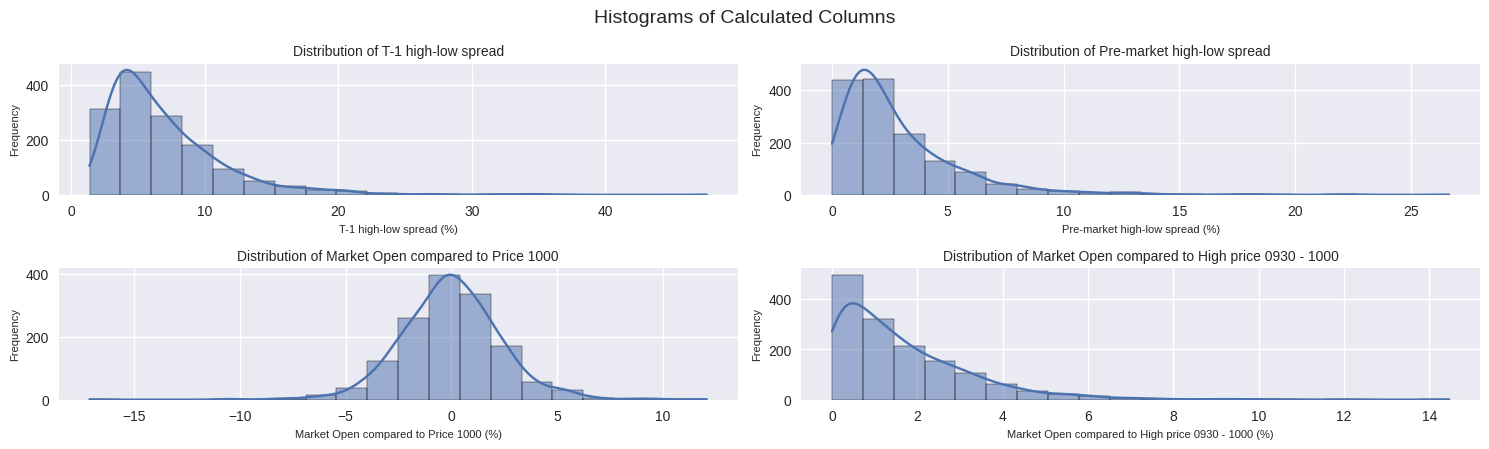

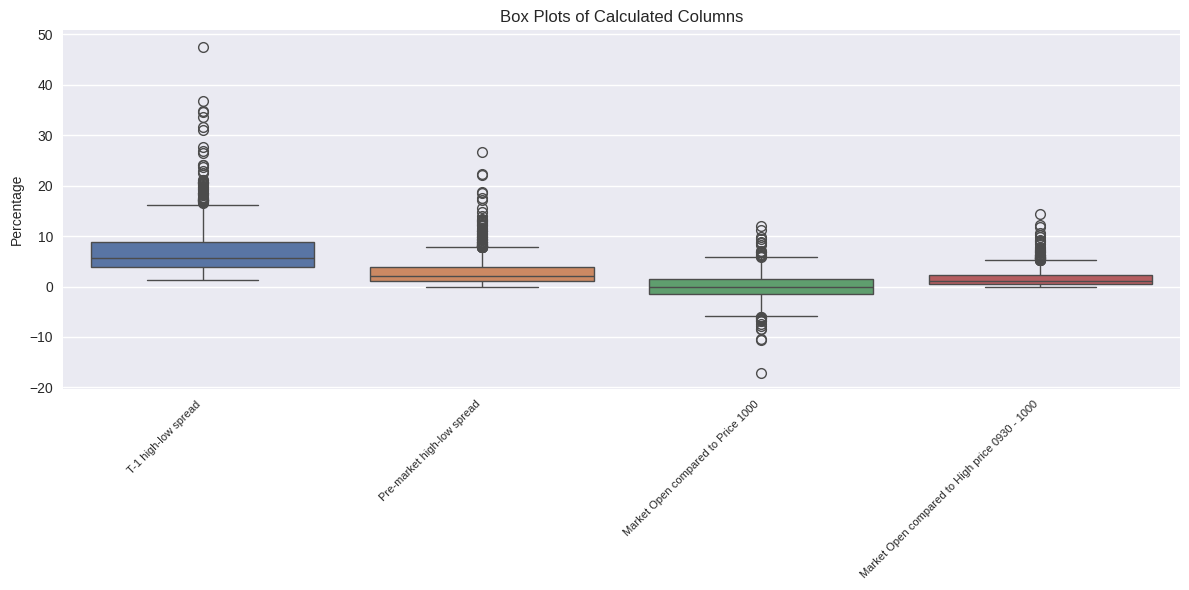

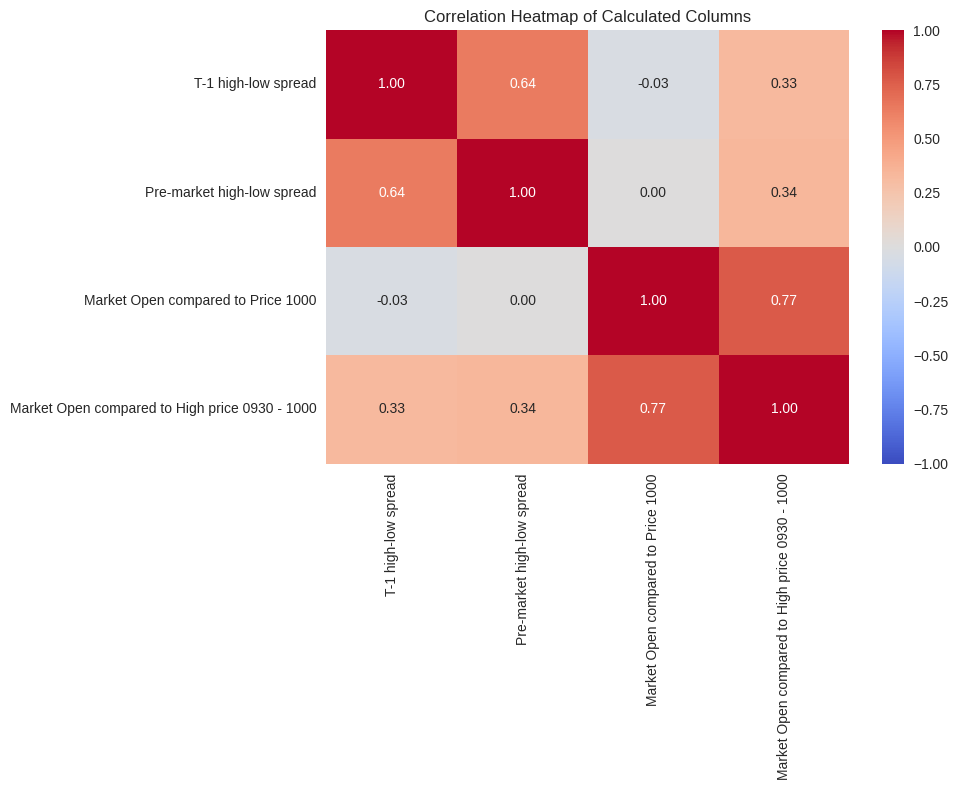

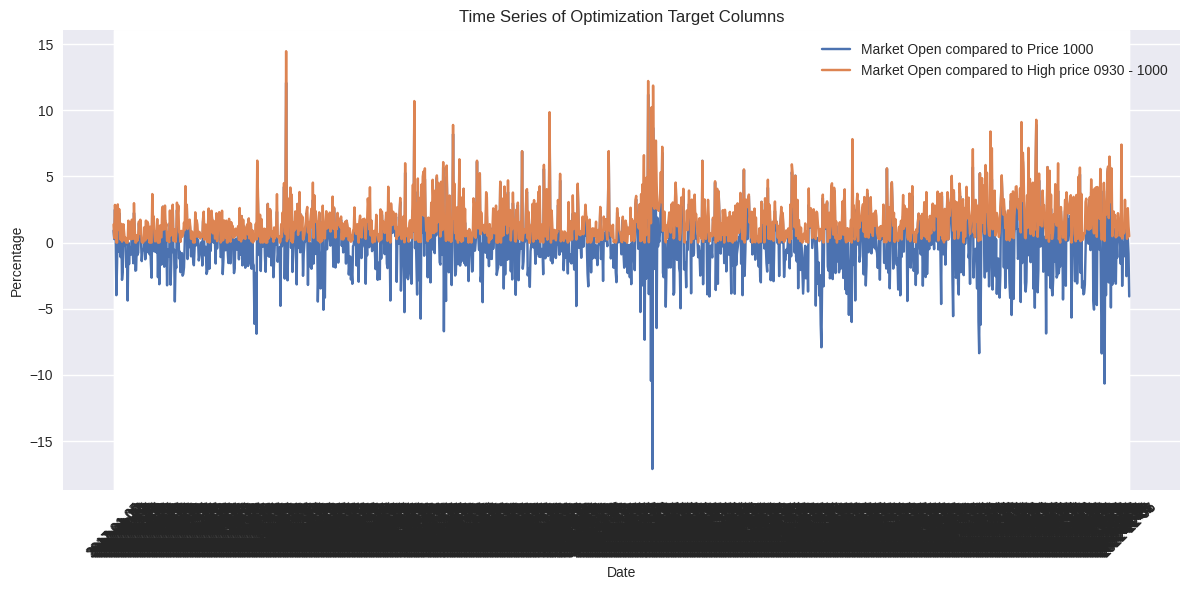

KeyError: "['T-1 Price change', 'Pre-market price change'] not in index"

In [76]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plot style for better visualization
plt.style.use('seaborn-v0_8')  # Use a valid Matplotlib style
sns.set_palette("deep")

# Load the processed CSV data
def load_data(csv_file):
    df = pd.read_csv(csv_file)
    return df

# Inspect and visualize the newly calculated columns
def inspect_metrics(df):
    # Define the new columns to inspect
    new_columns = [
        'T-1 high-low spread',
        'Pre-market high-low spread',
        'Market Open compared to Price 1000',
        'Market Open compared to High price 0930 - 1000'
    ]

    # Summary statistics
    print("Summary Statistics for Newly Calculated Columns:")
    print(df[new_columns].describe())

    # Check for missing values
    print("\nMissing Values in Newly Calculated Columns:")
    print(df[new_columns].isna().sum())

    # Correlation matrix
    print("\nCorrelation Matrix for Newly Calculated Columns:")
    corr_matrix = df[new_columns].corr()
    print(corr_matrix)

    # Detailed analysis for optimization target columns
    target_columns = [
        'Market Open compared to Price 1000',
        'Market Open compared to High price 0930 - 1000'
    ]

    print("\nDetailed Distribution Analysis for Optimization Targets:")
    for col in target_columns:
        print(f"\n--- {col} ---")
        # Skewness and Kurtosis
        print(f"Skewness: {stats.skew(df[col].dropna()):.4f}")
        print(f"Kurtosis: {stats.kurtosis(df[col].dropna()):.4f}")
        # Normality test (Shapiro-Wilk)
        stat, p_value = stats.shapiro(df[col].dropna())
        print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p_value:.4f}")
        # Outlier detection using IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col]
        print(f"Number of Outliers (IQR method): {len(outliers)}")

    # Visualizations for all calculated columns
    # 1. Histograms for all new columns
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(new_columns, 1):
        plt.subplot(5, 2, i)
        sns.histplot(df[col].dropna(), kde=True, bins=20)
        plt.title(f'Distribution of {col}', fontsize=10)
        plt.xlabel(f'{col} (%)', fontsize=8)
        plt.ylabel('Frequency', fontsize=8)
        plt.tight_layout()
    plt.suptitle('Histograms of Calculated Columns', fontsize=14, y=1.02)
    plt.show()

    # 2. Box plots for all new columns
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[new_columns])
    plt.title('Box Plots of Calculated Columns', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.ylabel('Percentage', fontsize=10)
    plt.tight_layout()
    plt.show()

    # 3. Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
    plt.title('Correlation Heatmap of Calculated Columns', fontsize=12)
    plt.tight_layout()
    plt.show()

    # 4. Time series plots for target columns
    plt.figure(figsize=(12, 6))
    for col in target_columns:
        plt.plot(df['Date'], df[col], label=col)
    plt.title('Time Series of Optimization Target Columns', fontsize=12)
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Percentage', fontsize=10)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 5. Pair plots for target columns vs. others (limited to avoid clutter)
    pair_columns = target_columns + ['T-1 Price change', 'Pre-market price change']
    sns.pairplot(df[pair_columns].dropna(), diag_kind='kde')
    plt.suptitle('Pair Plots for Target Columns and Selected Features', fontsize=14, y=1.02)
    plt.show()

    # 6. Violin plots for target columns
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df[target_columns])
    plt.title('Violin Plots of Optimization Target Columns', fontsize=12)
    plt.xticks(rotation=15, fontsize=8)
    plt.ylabel('Percentage', fontsize=10)
    plt.tight_layout()
    plt.show()

    print("\nAll plots displayed.")

# Main execution
if __name__ == "__main__":
    input_file = "train_data_v2.csv"

    # Load and inspect data
    df = load_data(input_file)
    inspect_metrics(df)

## 1. Model Training

In [64]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight

# Load the training data
df_train = pd.read_csv("train_data.csv")

# Calculate the defined result for each sample
defined_result = np.where(
    df_train["Market Open compared to High price 0930 - 1000"] >= 1,
    1,
    df_train["Market Open compared to Price 1000"]
)

# Create the target variable: y = 0 (Buy) if defined_result > 0, else y = 1 (Not Buy)
y_train = (defined_result <= 0).astype(int)

# Define input features
feature_cols = [
    "T-1 Price change",
    "T-1 high-low spread",
    "T-1 volume change",
    "T-1 volume compared to last 5 trading days average",
    "Pre-market price change",
    "Pre-market high-low spread",
    "Pre-market volume change",
    "Pre-market volume compared to last 5 trading days average"
]
X_train = df_train[feature_cols].values

# Compute class weights to handle imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Build the revised model
model = tf.keras.Sequential([
    layers.Dense(8, activation="relu", input_shape=(8,),
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(8, activation="relu",
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model with a higher learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with class weights
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2,
          class_weight=class_weight_dict, callbacks=[early_stopping], verbose=1)

# Export the trained model in HDF5 format
model.save("trading_signal_model.h5")

# Function to calculate defined result based on model predictions
def calculate_defined_result(predictions, df):
    defined_results = []
    for i, pred in enumerate(predictions):
        if pred < 0.5:  # Predict Buy (0)
            if df["Market Open compared to High price 0930 - 1000"].iloc[i] >= 1:
                defined_results.append(1)
            else:
                defined_results.append(df["Market Open compared to Price 1000"].iloc[i])
        else:  # Predict Not Buy (1)
            defined_results.append(0)
    return np.array(defined_results)

# Make predictions on the training set
y_pred_proba = model.predict(X_train)  # Use scaled features
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Calculate defined results
defined_results = calculate_defined_result(y_pred, df_train)

# Evaluate performance
false_negatives = ((y_pred == 1) & (defined_result > 0)).sum()  # Missed positives
false_positives = ((y_pred == 0) & (defined_results <= 0)).sum()  # Incorrect Buy leading to loss/no gain
buy_predictions = (y_pred == 0).sum()

print(f"Number of missed positive results (False Negatives): {false_negatives}")
print(f"Number of Buy predictions leading to loss/no gain (False Positives): {false_positives}")
print(f"Total Buy predictions: {buy_predictions}")
print(f"Proportion of missed positives: {false_negatives / (defined_result > 0).sum():.4f}")
print(f"Proportion of Buy predictions leading to loss: {false_positives / buy_predictions:.4f}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5063 - loss: 1.3472 - val_accuracy: 0.3287 - val_loss: 1.3459
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5022 - loss: 1.2907 - val_accuracy: 0.4291 - val_loss: 0.9867
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5267 - loss: 1.2167 - val_accuracy: 0.5433 - val_loss: 0.8842
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5350 - loss: 1.1793 - val_accuracy: 0.5813 - val_loss: 0.8436
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4900 - loss: 1.2761 - val_accuracy: 0.5952 - val_loss: 0.8304
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5093 - loss: 1.1370 - val_accuracy: 0.5882 - val_loss: 0.8293
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5168 - loss: 1.2103 - val_accuracy: 0.6055 - val_loss: 0.8220
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5424 - loss: 1.1639 - val_accuracy: 0.6021 - val_loss: 0.8226
Ep

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Number of missed positive results (False Negatives): 179
Number of Buy predictions leading to loss/no gain (False Positives): 436
Total Buy predictions: 1156
Proportion of missed positives: 0.1991
Proportion of Buy predictions leading to loss: 0.3772


In [74]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import RobustScaler
import tensorflow.keras.backend as K

# Load the training data
df_train = pd.read_csv("train_data.csv")

# Calculate the defined result for each sample
defined_result = np.where(
    df_train["Market Open compared to High price 0930 - 1000"] >= 1,
    1,
    df_train["Market Open compared to Price 1000"]
)

# Create the target variable: y = 0 (Buy) if defined_result > 0, else y = 1 (Not Buy)
y_train = (defined_result <= 0).astype(int)

# Define input features
feature_cols = [
    "T-1 Price change",
    "T-1 high-low spread",
    "T-1 volume change",
    "T-1 volume compared to last 5 trading days average",
    "Pre-market price change",
    "Pre-market high-low spread",
    "Pre-market volume change",
    "Pre-market volume compared to last 5 trading days average"
]
X_train = df_train[feature_cols].values

# Adjusted class weights for balance
class_weight_dict = {
    0: 1.0,  # Buy signals
    1: 2.0   # Not Buy signals (balanced to reduce false positives)
}

# Custom F1 score metric
def f1_metric(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')
    y_pred = K.round(y_pred)

    tp = K.sum(K.cast(y_true * y_pred, 'float32'))
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float32'))
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float32'))

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1

# Enhanced model architecture
model = tf.keras.Sequential([
    layers.Dense(24, input_shape=(8,), kernel_regularizer=regularizers.l2(0.005)),
    layers.LeakyReLU(alpha=0.01),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(16, kernel_regularizer=regularizers.l2(0.005)),
    layers.LeakyReLU(alpha=0.01),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(8, kernel_regularizer=regularizers.l2(0.005)),
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.2),

    layers.Dense(1, activation="sigmoid")
])

# Compile with binary cross-entropy
optimizer = Adam(learning_rate=0.002)
model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy", f1_metric]
)

# Callbacks with F1 monitoring
early_stopping = EarlyStopping(
    monitor='val_f1_metric',
    patience=30,
    restore_best_weights=True,
    mode='max'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_f1_metric',
    factor=0.5,
    patience=20,
    mode='max',
    min_lr=0.0001
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Export the trained model
model.save("trading_signal_model_v6.h5")

# Function to calculate defined result
def calculate_defined_result(predictions, df):
    defined_results = []
    for i, pred in enumerate(predictions):
        if pred < 0.5:  # Predict Buy (0)
            if df["Market Open compared to High price 0930 - 1000"].iloc[i] >= 1:
                defined_results.append(1)
            else:
                defined_results.append(df["Market Open compared to Price 1000"].iloc[i])
        else:  # Predict Not Buy (1)
            defined_results.append(0)
    return np.array(defined_results)

# Make predictions and optimize threshold
y_pred_proba = model.predict(X_train)

# Find optimal threshold for F1 score
thresholds = np.arange(0.1, 0.9, 0.05)
best_threshold = 0.5
best_f1 = 0

for threshold in thresholds:
    y_pred_temp = (y_pred_proba > threshold).astype(int).flatten()
    defined_results_temp = calculate_defined_result(y_pred_temp, df_train)

    tp = ((y_pred_temp == 0) & (defined_result > 0)).sum()
    fp = ((y_pred_temp == 0) & (defined_results_temp <= 0)).sum()
    fn = ((y_pred_temp == 1) & (defined_result > 0)).sum()

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Optimal threshold: {best_threshold:.3f}")

# Final predictions with optimal threshold
y_pred = (y_pred_proba > best_threshold).astype(int).flatten()
defined_results = calculate_defined_result(y_pred, df_train)

# Evaluate performance
false_negatives = ((y_pred == 1) & (defined_result > 0)).sum()
false_positives = ((y_pred == 0) & (defined_results <= 0)).sum()
buy_predictions = (y_pred == 0).sum()
total_positives = (defined_result > 0).sum()

print(f"\n=== Model Performance with Optimized Threshold ===")
print(f"Number of missed positive results (False Negatives): {false_negatives}")
print(f"Number of Buy predictions leading to lossjudge_positives: {false_positives}")
print(f"Total Buy predictions: {buy_predictions}")
print(f"Total positive opportunities: {total_positives}")
print(f"Proportion of missed positives: {false_negatives / total_positives:.4f}")
if buy_predictions > 0:
    print(f"Proportion of Buy predictions leading to loss: {false_positives / buy_predictions:.4f}")
    print(f"Precision (successful buys): {(buy_predictions - false_positives) / buy_predictions:.4f}")
print(f"Recall (caught opportunities): {(total_positives - false_negatives) / total_positives:.4f}")

# Trading summary
successful_buys = buy_predictions - false_positives
captured_profit = total_positives - false_negatives

print(f"\n=== Trading Performance Summary ===")
print(f"Successful buy signals: {successful_buys}")
print(f"Captured profit opportunities: {captured_profit} out of {total_positives}")
print(f"Profit capture rate: {captured_profit / total_positives:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.4742 - f1_metric: 0.5291 - loss: 1.2780 - val_accuracy: 0.6782 - val_f1_metric: 0.1222 - val_loss: 0.8571 - learning_rate: 0.0020
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4916 - f1_metric: 0.5096 - loss: 1.2183 - val_accuracy: 0.5779 - val_f1_metric: 0.2581 - val_loss: 0.8552 - learning_rate: 0.0020
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5031 - f1_metric: 0.5195 - loss: 1.1835 - val_accuracy: 0.5190 - val_f1_metric: 0.3165 - val_loss: 0.8586 - learning_rate: 0.0020
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4862 - f1_metric: 0.4831 - loss: 1.1193 - val_accuracy: 0.4429 - val_f1_metric: 0.3616 - val_loss: 0.8595 - learning_rate: 0.0020
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4754 - f1_metric: 0.4910 - loss: 1.1369 - val_accuracy: 0.4325 - val_f1_metric: 0.3681 - val_loss: 0.8547 - learning_rate: 0.0020
Epoch 6/20
37/37 ━━━━━━━━━

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Optimal threshold: 0.650

=== Model Performance with Optimized Threshold ===
Number of missed positive results (False Negatives): 1
Number of Buy predictions leading to lossjudge_positives: 542
Total Buy predictions: 1440
Total positive opportunities: 899
Proportion of missed positives: 0.0011
Proportion of Buy predictions leading to loss: 0.3764
Precision (successful buys): 0.6236
Recall (caught opportunities): 0.9989

=== Trading Performance Summary ===
Successful buy signals: 898
Captured profit opportunities: 898 out of 899
Profit capture rate: 0.9989


In [90]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight

# Load the training data
df_train = pd.read_csv("train_data_v2.csv")

# Calculate the defined result for each sample
defined_result = np.where(
    df_train["Market Open compared to High price 0930 - 1000"] >= 1,
    1,
    df_train["Market Open compared to Price 1000"]
)

# Create the target variable: y = 0 (Buy) if defined_result > 0, else y = 1 (Not Buy)
y_train = (defined_result <= 0).astype(int)

# Define input features
feature_cols = [
    "T-1 high-low spread",
    "Pre-market high-low spread",
]
X_train = df_train[feature_cols].values

# Scale the input features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Compute class weights to handle imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Build the revised model with corrected input shape
model = tf.keras.Sequential([
    layers.Dense(8, activation="relu", input_shape=(2,),  # Adjusted to match 2 features
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(8, activation="relu",
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model with a higher learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with class weights
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2,
          class_weight=class_weight_dict, callbacks=[early_stopping], verbose=1)

# Export the trained model in HDF5 format
model.save("trading_signal_model.h5")

# Function to calculate defined result based on model predictions
def calculate_defined_result(predictions, df):
    defined_results = []
    for i, pred in enumerate(predictions):
        if pred < 0.5:  # Predict Buy (0)
            if df["Market Open compared to High price 0930 - 1000"].iloc[i] >= 1:
                defined_results.append(1)
            else:
                defined_results.append(df["Market Open compared to Price 1000"].iloc[i])
        else:  # Predict Not Buy (1)
            defined_results.append(0)
    return np.array(defined_results)

# Make predictions on the training set
y_pred_proba = model.predict(X_train)  # Use scaled features
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Calculate defined results
defined_results = calculate_defined_result(y_pred, df_train)

# Evaluate performance
false_negatives = ((y_pred == 1) & (defined_result > 0)).sum()  # Missed positives
false_positives = ((y_pred == 0) & (defined_results <= 0)).sum()  # Incorrect Buy leading to loss/no gain
buy_predictions = (y_pred == 0).sum()

# Avoid division by zero in evaluation metrics
missed_positives_prop = false_negatives / max((defined_result > 0).sum(), 1)
buy_loss_prop = false_positives / max(buy_predictions, 1)

print(f"Number of missed positive results (False Negatives): {false_negatives}")
print(f"Number of Buy predictions leading to loss/no gain (False Positives): {false_positives}")
print(f"Total Buy predictions: {buy_predictions}")
print(f"Proportion of missed positives: {missed_positives_prop:.4f}")
print(f"Proportion of Buy predictions leading to loss: {buy_loss_prop:.4f}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4766 - loss: 1.0158 - val_accuracy: 0.5156 - val_loss: 0.7817
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4169 - loss: 1.0448 - val_accuracy: 0.4913 - val_loss: 0.7924
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5060 - loss: 0.9515 - val_accuracy: 0.4913 - val_loss: 0.8018
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5042 - loss: 0.9550 - val_accuracy: 0.4948 - val_loss: 0.8099
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4956 - loss: 0.9871 - val_accuracy: 0.4844 - val_loss: 0.8136
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4865 - loss: 1.0154 - val_accuracy: 0.5017 - val_loss: 0.8151


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Number of missed positive results (False Negatives): 672
Number of Buy predictions leading to loss/no gain (False Positives): 95
Total Buy predictions: 323
Proportion of missed positives: 0.7467
Proportion of Buy predictions leading to loss: 0.2941


Class weights: {0: np.float64(0.8016666666666666), 1: np.float64(1.328729281767956)}
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4623 - f1_metric: 0.4923 - loss: 1.0149 - val_accuracy: 0.1583 - val_f1_metric: 0.2464 - val_loss: 0.7889 - learning_rate: 0.0010
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4855 - f1_metric: 0.4865 - loss: 0.9040 - val_accuracy: 0.3139 - val_f1_metric: 0.4523 - val_loss: 0.7944 - learning_rate: 0.0010
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5048 - f1_metric: 0.4549 - loss: 0.8232 - val_accuracy: 0.4250 - val_f1_metric: 0.5718 - val_loss: 0.7836 - learning_rate: 0.0010
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4715 - f1_metric: 0.4608 - loss: 0.8463 - val_accuracy: 0.4139 - val_f1_metric: 0.5631 - val_loss: 0.7794 - learning_rate: 0.0010
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5193 - f1_metric: 0.4385 - loss: 0.7797 - val_accuracy: 0.3500 - val_f1_metric: 0.5002 - val_loss: 0.7913 - learning_rate: 0.0010
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


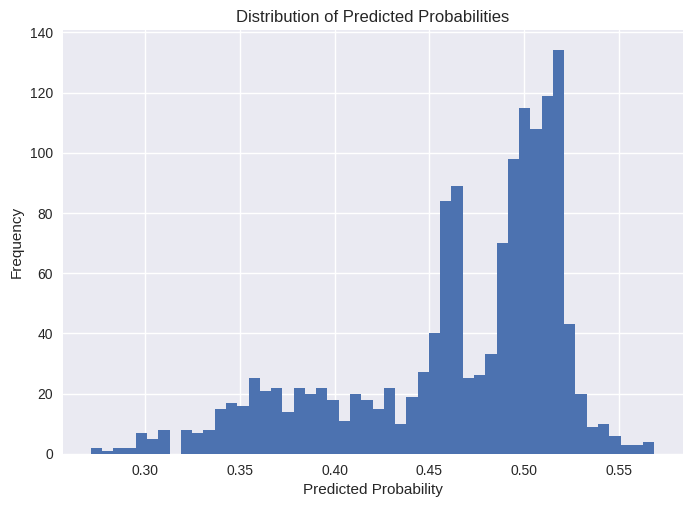

Optimal threshold: 0.560

Confusion Matrix:
[[898   2]
 [539   4]]

=== Model Performance with Optimized Threshold ===
Number of missed positive results (False Negatives): 2
Number of Buy predictions leading to loss: 539
Total Buy predictions: 1437
Total positive opportunities: 900
Proportion of missed positives: 0.0022
Proportion of Buy predictions leading to loss: 0.3751
Precision (successful buys): 0.6249
Recall (caught opportunities): 0.9978

=== Trading Performance Summary ===
Successful buy signals: 898
Captured profit opportunities: 898 out of 900
Profit capture rate: 0.9978


In [94]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the training data
df_train = pd.read_csv("train_data_v2.csv")

# Calculate the defined result for each sample
defined_result = np.where(
    df_train["Market Open compared to High price 0930 - 1000"] >= 1,
    1,
    df_train["Market Open compared to Price 1000"]
)

# Create the target variable: y = 0 (Buy) if defined_result > 0, else y = 1 (Not Buy)
y_train = (defined_result <= 0).astype(int)

# Define input features
feature_cols = [
    "T-1 high-low spread",
    "Pre-market high-low spread"
]
X_train = df_train[feature_cols].values

# Scale features using RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
print(f"Class weights: {class_weight_dict}")

# Custom F1 score metric
def f1_metric(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')
    y_pred = K.round(y_pred)

    tp = K.sum(K.cast(y_true * y_pred, 'float32'))
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float32'))
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float32'))

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1

# Enhanced model architecture
model = tf.keras.Sequential([
    layers.Dense(32, input_shape=(2,), kernel_regularizer=regularizers.l2(0.001)),
    layers.LeakyReLU(alpha=0.01),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001)),
    layers.LeakyReLU(alpha=0.01),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(8, kernel_regularizer=regularizers.l2(0.001)),
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.2),

    layers.Dense(1, activation="sigmoid")
])

# Compile with binary cross-entropy
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy", f1_metric]
)

# Callbacks with F1 monitoring
early_stopping = EarlyStopping(
    monitor='val_f1_metric',
    patience=50,
    restore_best_weights=True,
    mode='max'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_f1_metric',
    factor=0.5,
    patience=20,
    mode='max',
    min_lr=0.00001
)

# Train the model
history = model.fit(
    X_train_resampled, y_train_resampled,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Export the trained model
model.save("trading_signal_model_v7.h5")

# Function to calculate defined result
def calculate_defined_result(predictions, df):
    defined_results = []
    for i, pred in enumerate(predictions):
        if pred < 0.5:  # Predict Buy (0)
            if df["Market Open compared to High price 0930 - 1000"].iloc[i] >= 1:
                defined_results.append(1)
            else:
                defined_results.append(df["Market Open compared to Price 1000"].iloc[i])
        else:  # Predict Not Buy (1)
            defined_results.append(0)
    return np.array(defined_results)

# Make predictions and optimize threshold
y_pred_proba = model.predict(X_train)

# Analyze probability distribution
plt.hist(y_pred_proba, bins=50)
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

# Find optimal threshold for weighted F1 score (prioritizing precision)
thresholds = np.arange(0.05, 0.95, 0.01)
best_threshold = 0.5
best_f1 = 0

for threshold in thresholds:
    y_pred_temp = (y_pred_proba > threshold).astype(int).flatten()
    defined_results_temp = calculate_defined_result(y_pred_temp, df_train)

    tp = ((y_pred_temp == 0) & (defined_result > 0)).sum()
    fp = ((y_pred_temp == 0) & (defined_results_temp <= 0)).sum()
    fn = ((y_pred_temp == 1) & (defined_result > 0)).sum()

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    # Weighted F1 to prioritize precision (reduce false positives)
    weighted_f1 = (1.5 * precision * recall) / (0.5 * precision + recall) if (precision + recall) > 0 else 0

    if weighted_f1 > best_f1:
        best_f1 = weighted_f1
        best_threshold = threshold

print(f"Optimal threshold: {best_threshold:.3f}")

# Final predictions with optimal threshold
y_pred = (y_pred_proba > best_threshold).astype(int).flatten()
defined_results = calculate_defined_result(y_pred, df_train)

# Evaluate performance
false_negatives = ((y_pred == 1) & (defined_result > 0)).sum()
false_positives = ((y_pred == 0) & (defined_results <= 0)).sum()
buy_predictions = (y_pred == 0).sum()
total_positives = (defined_result > 0).sum()

# Confusion matrix
cm = confusion_matrix(y_train, y_pred)
print(f"\nConfusion Matrix:\n{cm}")

print(f"\n=== Model Performance with Optimized Threshold ===")
print(f"Number of missed positive results (False Negatives): {false_negatives}")
print(f"Number of Buy predictions leading to loss: {false_positives}")
print(f"Total Buy predictions: {buy_predictions}")
print(f"Total positive opportunities: {total_positives}")
print(f"Proportion of missed positives: {false_negatives / total_positives:.4f}")
if buy_predictions > 0:
    print(f"Proportion of Buy predictions leading to loss: {false_positives / buy_predictions:.4f}")
    print(f"Precision (successful buys): {(buy_predictions - false_positives) / buy_predictions:.4f}")
print(f"Recall (caught opportunities): {(total_positives - false_negatives) / total_positives:.4f}")

# Trading summary
successful_buys = buy_predictions - false_positives
captured_profit = total_positives - false_negatives

print(f"\n=== Trading Performance Summary ===")
print(f"Successful buy signals: {successful_buys}")
print(f"Captured profit opportunities: {captured_profit} out of {total_positives}")
print(f"Profit capture rate: {captured_profit / total_positives:.4f}")

## 2. Test on Validation set

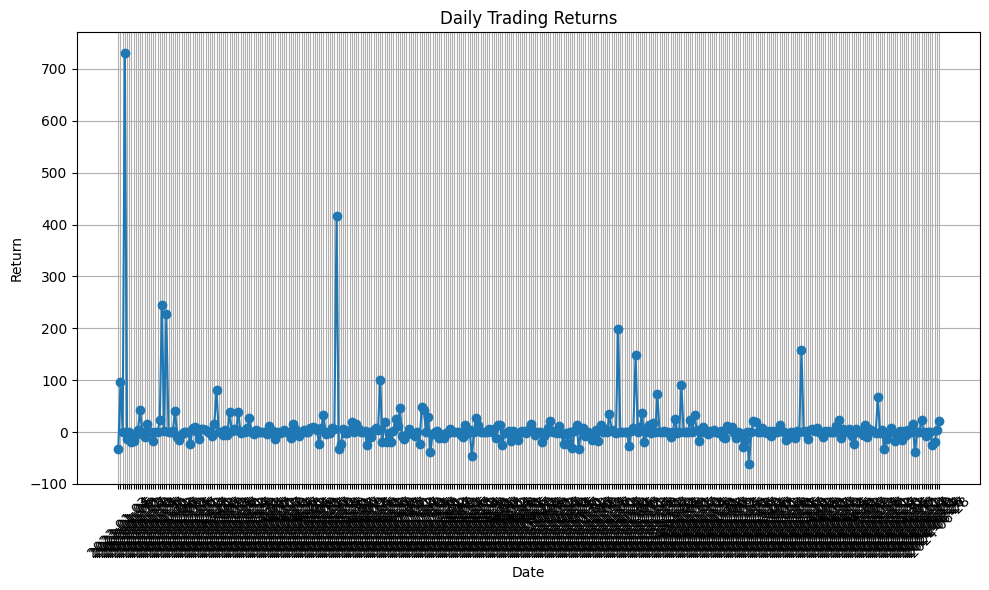


Daily Trading Returns and Signals:
           Date Signal_0930 Signal_0931 Signal_0935 Signal_0940 Signal_0945  \
0    2023-01-03       buy 7      sell 7        hold        hold        hold   
1    2023-01-04       buy 7        hold      sell 7        hold        hold   
2    2023-01-05       buy 7      sell 7        hold        hold        hold   
3    2023-01-06       buy 7        hold      sell 7       buy 7        hold   
4    2023-01-09       buy 7      sell 7        hold        hold        hold   
..          ...         ...         ...         ...         ...         ...   
372  2024-06-24       buy 7        hold        hold      sell 7       buy 7   
373  2024-06-25       buy 7      sell 7        hold        hold        hold   
374  2024-06-26        hold       buy 7        hold      sell 7        hold   
375  2024-06-27        hold       buy 7      sell 7        hold        hold   
376  2024-06-28       buy 7        hold        hold      sell 7        hold   

    Signal_0950

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from collections import Counter

# For Jupyter notebooks, uncomment the following line
# %matplotlib inline

# Load and preprocess test data
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df.fillna(0, inplace=True)

    pre_market_features = [
        'T-1 Price change', 'T-1 high-low spread', 'T-1 volume change',
        'T-1 volume compared to last 5 trading days average', 'Pre-market price change at 08:00',
        'Pre-market volume at 0800 compared to last 5 trading days average',
        'Pre-market volume at 0800 compare to T-1 volume', 'Pre-market price change',
        'Pre-market high-low spread', 'Pre-market volume compare to T-1 volume',
        'Pre-market volume change',
        'Pre-market volume compared to last 5 trading days average',
        'market_sentiment'
    ]

    interval_features = {
        0: ['Market Open compared to T-1 Close', 'Market Open compared to Pre-market close',
            '0930-0931 high-low spread'],
        1: ['Price 0935 compared to Price 0931', '0931-0935 high-low spread',
            'Volume 0935 change', 'Volume 0935 compared to last 5 trading days average'],
        2: ['Price 0940 compared to Price 0935', '0935-0940 high-low spread',
            'Volume 0940 change', 'Volume 0940 compare to Volume 0935',
            'Volume 0940 compared to last 5 trading days average'],
        3: ['Price 0945 compared to Price 0940', '0941-0945 high-low spread',
          'Volume 0945 change', 'Volume 0945 compare to Volume 0940',
          'Volume 0945 compared to last 5 trading days average'],
        4: ['Price 0950 compared to Price 0945', '0946-0950 high-low spread',
          'Volume 0950 change', 'Volume 0950 compare to Volume 0945',
          'Volume 0950 compared to last 5 trading days average'],
        5: ['Price 0955 compared to Price 0950', '0951-0955 high-low spread',
          'Volume 0955 change', 'Volume 0955 compare to Volume 0950',
          'Volume 0955 compared to last 5 trading days average']
    }

    scaler = StandardScaler()
    features = df.drop(columns=['Date']).columns
    df[features] = scaler.fit_transform(df[features])

    return df, pre_market_features, interval_features

# Interpolate features for 9:31
def interpolate_931_features(row):
    features_930 = [
        row['Market Open compared to T-1 Close'],
        row['Market Open compared to Pre-market close'],
        row['0930-0931 high-low spread']
    ]
    features_935 = [
        row['Price 0935 compared to Price 0931'],
        row['0931-0935 high-low spread'],
        row['Volume 0935 change']
    ]
    interpolated = [(f1 + f2) / 2 for f1, f2 in zip(features_930, features_935)]
    return np.array(interpolated)

# Prepare 5-minute interval data with position feature
def prepare_interval_data(row, pre_market_features, interval_features, max_features, positions):
    n_intervals = 6
    interval_data = []

    for i in range(n_intervals):
        feats = [row[f] for f in interval_features[i]]
        if i == 0:
            feats.extend([row[f] for f in pre_market_features])
            feats.append(positions[i])
        else:
            feats.extend([0] * len(pre_market_features))
            feats.append(positions[i])
        feats = feats + [0] * (max_features - len(feats))
        interval_data.append(feats)

    return np.array(interval_data)

# Reconstruct price path
def reconstruct_price_path(row, prev_close=1.0):
    prices = {}
    required_columns = [
        'Market Open compared to T-1 Close', 'Price 0931 compared to market open',
        'Price 0935 compared to Price 0931', 'Price 0940 compared to Price 0935',
        'Price 0945 compared to Price 0940', 'Price 0950 compared to Price 0945',
        'Price 0955 compared to Price 0950', 'Price 1000 compared to Price 0955'
    ]
    if not all(col in row for col in required_columns):
        raise ValueError(f"Missing required price columns: {[col for col in required_columns if col not in row]}")

    prices['0930'] = prev_close * (1 + row['Market Open compared to T-1 Close'])
    prices['0931'] = prices['0930'] * (1 + row['Price 0931 compared to market open'])
    prices['0935'] = prices['0931'] * (1 + row['Price 0935 compared to Price 0931'])
    prices['0940'] = prices['0935'] * (1 + row['Price 0940 compared to Price 0935'])
    prices['0945'] = prices['0940'] * (1 + row['Price 0945 compared to Price 0940'])
    prices['0950'] = prices['0945'] * (1 + row['Price 0950 compared to Price 0945'])
    prices['0955'] = prices['0950'] * (1 + row['Price 0955 compared to Price 0950'])
    prices['1000'] = prices['0955'] * (1 + row['Price 1000 compared to Price 0955'])
    signal_times = ['0930', '0931', '0935', '0940', '0945', '0950', '0955']
    return [prices[t] for t in signal_times] + [prices['1000']]

# Predict signals with position constraints and compute daily return
def predict_with_constraints(model, X, prices, signal_times):
    predictions = model.predict(X, verbose=0)
    constrained_actions = []
    computed_returns = []

    for sample, day_prices in zip(predictions, prices):
        pos = 0
        day_actions = []
        daily_return = 0.0

        for t in signal_times:
            probs = sample[t]
            action_indices = np.argsort(probs)[::-1]

            for action_idx in action_indices:
                if action_idx == 0:
                    action = 0
                elif 1 <= action_idx <= 7:
                    action = action_idx
                else:
                    action = -(action_idx - 7)

                new_pos = pos + action
                if new_pos < 0 or new_pos > 7:
                    continue
                if action < 0 and pos == 0:
                    continue
                if pos == 7 and action > 0:
                    continue

                daily_return += -action * day_prices[t]
                day_actions.append(action)
                pos = new_pos
                break
            else:
                day_actions.append(0)

        daily_return += pos * day_prices[len(signal_times)]
        constrained_actions.append(day_actions)
        computed_returns.append(daily_return)

    return np.array(constrained_actions), computed_returns

# Prepare test data for model with position feature
def prepare_test_data(df, pre_market_features, interval_features, model):
    X = []
    prices_list = []
    max_features = max(
        len(interval_features[0]) + len(pre_market_features) + 1,
        len(interval_features[1]) + len(pre_market_features) + 1,
        len(interval_features[2]) + len(pre_market_features) + 1,
        len(interval_features[3]) + len(pre_market_features) + 1,
        len(interval_features[4]) + len(pre_market_features) + 1,
        len(interval_features[5]) + len(pre_market_features) + 1,
        len(interpolate_931_features(df.iloc[0])) + len(pre_market_features) + 1
    )

    # First pass: Predict with zero positions
    temp_X = []
    for _, row in df.iterrows():
        prices = reconstruct_price_path(row)
        prices_list.append(prices)
        positions = [0] * 7
        interval_data = prepare_interval_data(row, pre_market_features, interval_features, max_features, positions[:-1])
        features_931 = interpolate_931_features(row)
        features_931 = np.concatenate([features_931, np.zeros(max_features - len(features_931) - 1)])
        features_931 = np.append(features_931, 0)
        interval_data = np.insert(interval_data, 1, features_931, axis=0)
        temp_X.append(interval_data)

    temp_X = np.array(temp_X)
    signals, _ = predict_with_constraints(model, temp_X, prices_list, list(range(7)))

    # Second pass: Use predicted positions
    for i, (index, row) in enumerate(df.iterrows()):
        day_signals = signals[i]
        positions = [0]
        pos = 0
        for a in day_signals:
            pos = max(pos + a, 0)
            positions.append(pos)

        interval_data = prepare_interval_data(row, pre_market_features, interval_features, max_features, positions[:-1])
        features_931 = interpolate_931_features(row)
        features_931 = np.concatenate([features_931, np.zeros(max_features - len(features_931) - 1)])
        features_931 = np.append(features_931, positions[1])
        interval_data = np.insert(interval_data, 1, features_931, axis=0)
        X.append(interval_data)

    return np.array(X), df['Date'], prices_list

# Format signal as string
def format_signal(action):
    if action == 0:
        return 'hold'
    elif action > 0:
        return f'buy {action}'
    else:
        return f'sell {abs(action)}'

# Compute signal frequency
def compute_signal_frequency(signals):
    flat_signals = signals.flatten()
    total_signals = len(flat_signals)

    action_types = Counter('buy' if s > 0 else 'sell' if s < 0 else 'hold' for s in flat_signals)
    action_percentages = {k: (v / total_signals) * 100 for k, v in action_types.items()}

    action_details = Counter(format_signal(s) for s in flat_signals)
    action_detail_percentages = {k: (v / total_signals) * 100 for k, v in action_details.items()}

    return action_types, action_percentages, action_details, action_detail_percentages

# Plot daily returns
def plot_daily_returns(dates, returns):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, returns, marker='o', linestyle='-')
    plt.title('Daily Trading Returns')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Test model and compute returns with signals
def test_model(model_path, test_file_path):
    model = load_model(model_path)
    df, pre_market_features, interval_features = load_and_preprocess_data(test_file_path)
    X, dates, prices_list = prepare_test_data(df, pre_market_features, interval_features, model)

    signals, daily_returns = predict_with_constraints(model, X, prices_list, list(range(7)))

    all_signals = [[format_signal(a) for a in day_signals] for day_signals in signals]

    signal_columns = ['Signal_0930', 'Signal_0931', 'Signal_0935', 'Signal_0940',
                      'Signal_0945', 'Signal_0950', 'Signal_0955']
    results = pd.DataFrame(all_signals, columns=signal_columns)
    results.insert(0, 'Date', dates)
    results['Daily Return'] = daily_returns

    summary_stats = {
        'Mean Return': np.mean(daily_returns),
        'Median Return': np.median(daily_returns),
        'Std Dev': np.std(daily_returns),
        'Min Return': np.min(daily_returns),
        'Max Return': np.max(daily_returns),
        '25th Percentile': np.percentile(daily_returns, 25),
        '75th Percentile': np.percentile(daily_returns, 75),
        'Skewness': pd.Series(daily_returns).skew()
    }

    action_types, action_percentages, action_details, action_detail_percentages = compute_signal_frequency(signals)

    plot_daily_returns(dates, daily_returns)

    return results, summary_stats, action_types, action_percentages, action_details, action_detail_percentages

# Main execution
if __name__ == "__main__":
    model_path = "trading_signal_model_5min.h5"
    test_file_path = "validation_data.csv"
    results, summary_stats, action_types, action_percentages, action_details, action_detail_percentages = test_model(model_path, test_file_path)

    print("\nDaily Trading Returns and Signals:")
    print(results)

    print("\nSummary Statistics of Daily Returns:")
    for stat, value in summary_stats.items():
        print(f"{stat}: {value:.6f}")

    print("\nSignal Frequency Analysis:")
    print("Action Types (Counts):")
    for action, count in action_types.items():
        print(f"{action}: {count}")
    print("\nAction Types (Percentages):")
    for action, percentage in action_percentages.items():
        print(f"{action}: {percentage:.2f}%")
    print("\nDetailed Actions (Counts):")
    for action, count in action_details.items():
        print(f"{action}: {count}")
    print("\nDetailed Actions (Percentages):")
    for action, percentage in action_detail_percentages.items():
        print(f"{action}: {percentage:.2f}%")

    print("\nResults saved to 'trading_results_with_signals.csv'")
    results.to_csv("trading_results_with_signals.csv", index=False)